In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dtype = {'file' : 'str', 'time' : np.float64, '#nodes' : np.float64, 'pathlength' : np.float64, 'horizon' : np.float64, '#moves' : np.float64}

df = pd.read_csv("./benchmarkResults/25-07_benchmark_results.csv", dtype = dtype)
dfg = pd.read_csv("./benchmarkResults/greedy_benchmark_results.csv", dtype = dtype)

dfng = pd.read_csv("./benchmarkResults/greedy_incremental_rob_num.csv", dtype = dtype)

dfng

,file,time,#nodes,pathlength,horizon,#moves
0,num_robots_benchmark\10robs.lp,3.399227,26.0,21.0,14.0,59.0
1,num_robots_benchmark\11robs.lp,9.065166,69.0,46.0,14.0,85.0
2,num_robots_benchmark\12robs.lp,19.861134,59.0,43.0,14.0,92.0
3,num_robots_benchmark\13robs.lp,26.939125,72.0,41.0,14.0,96.0
4,num_robots_benchmark\14robs.lp,31.112223,124.0,71.0,14.0,104.0
5,num_robots_benchmark\15robs.lp,25.210158,90.0,56.0,14.0,112.0
6,num_robots_benchmark\16robs.lp,30.002659,99.0,62.0,14.0,106.0
7,num_robots_benchmark\17robs.lp,31.023188,96.0,60.0,14.0,127.0
8,num_robots_benchmark\18robs.lp,67.029485,215.0,110.0,14.0,129.0
9,num_robots_benchmark\19robs.lp,53.268207,177.0,108.0,14.0,128.0


In [2]:
g1 = pd.read_csv("inc_benchmarkResults/greedy1.csv")
g2 = pd.read_csv("inc_benchmarkResults/greedy2.csv")
g3 = pd.read_csv("inc_benchmarkResults/greedy3.csv")
g4 = pd.read_csv("inc_benchmarkResults/greedy4.csv")
g5 = pd.read_csv("inc_benchmarkResults/greedy5.csv")


#Nullen bei pathlength sehr komisch, das sollte sich mal jemand anschauen

# use this for only the times
#df = pd.concat([g1.iloc[:,:2], g2.iloc[:,:2], g3.iloc[:,:2]])
dfig = pd.concat([g1, g2, g3, g4, g5])
by_row_index = df.groupby(df.index)
# calculate means for times of all dataframes
df_means = by_row_index.mean()
df_means

,time,#nodes,pathlength,horizon,#moves
0,0.024286,2.0,0.0,5.0,19.0
1,0.753991,10.0,3.0,7.0,28.0
2,0.215480,5.0,2.0,6.0,20.0
3,0.757107,14.0,4.0,6.0,20.0
4,0.119025,3.0,1.0,5.0,15.0
...,...,...,...,...,...
160,NaN,NaN,NaN,NaN,NaN
161,NaN,NaN,NaN,NaN,NaN
162,NaN,NaN,NaN,NaN,NaN
163,NaN,NaN,NaN,NaN,NaN


In [3]:
def size(row):
    return int(str(row["file"]).split("/")[2][-1])

def density(row):
    return int(str(row["file"]).split("/")[3][-2:])

def ex(row):
    return int(str(row["file"]).split("/")[4][2])

def num(row):
    return int(str(row["file"]).split("/")[0].split("\\")[1].split("r")[0])

df['size'] = df.apply(lambda row: size(row), axis=1)
df['density'] = df.apply(lambda row: density(row), axis=1)
df['ex'] = df.apply(lambda row: ex(row), axis=1)
            
dfg['size'] = dfg.apply(lambda row: size(row), axis=1)
dfg['density'] = dfg.apply(lambda row: density(row), axis=1)
dfg['ex'] = dfg.apply(lambda row: ex(row), axis=1)

dfng['num'] = dfng.apply(lambda row: num(row), axis=1)

dfnga = dfng.iloc[0:10]
dfngb = dfng.iloc[10:]
dfng = pd.concat([dfngb, dfnga], sort=False)
dfng

# Nummerierung der Zeilen fixen
print(dfg)

                                               file        time  #nodes  \
0     ./benchmark_examples/size5x5/density20/ex1.lp    0.007837     2.0   
1    ./benchmark_examples/size5x5/density20/ex10.lp    0.284192    11.0   
2    ./benchmark_examples/size5x5/density20/ex11.lp    0.053577     3.0   
3    ./benchmark_examples/size5x5/density20/ex12.lp    0.171641     9.0   
4    ./benchmark_examples/size5x5/density20/ex13.lp    0.025849     3.0   
..                                              ...         ...     ...   
175   ./benchmark_examples/size8x8/density40/ex5.lp   35.582318   157.0   
176   ./benchmark_examples/size8x8/density40/ex6.lp   50.728633   216.0   
177   ./benchmark_examples/size8x8/density40/ex7.lp   22.380689   126.0   
178   ./benchmark_examples/size8x8/density40/ex8.lp  305.970688   796.0   
179   ./benchmark_examples/size8x8/density40/ex9.lp    7.607864    43.0   

     pathlength  horizon  #moves  size  density  ex  
0           0.0      5.0    19.0     5       

In [4]:
# sort data by size + density

def sort_by_category(to_sort):
    '''returns list of DataFrames'''
    lcg = [] #(List of Categorised Groups)
    for i in range(int((len(to_sort))/15)):
        lcg.append(to_sort.iloc[(i*15):(i*15+15)])
    return lcg

# list of DataFrames, split by size + density
catList = sort_by_category(df)
greedyCatList = sort_by_category(dfg)



# for every df in received list, 
# calculate how many NaN rows are in there
# returns: list of int

def nan_counter(cat_df):
    lc = [] # List of Counts
    for elem in cat_df:
        counter = 0
        for i in range(15):
            if np.isnan(elem["time"].iloc[i]):
                counter += 1
        lc.append(counter)
    return lc

# list of NaN rows in cat_list df
nanList = nan_counter(catList)
greedyNanList = nan_counter(greedyCatList)

print(nanList)

# calculate list of mean times 
def mean_list(df_list, nan_List):
    l = []
    counter = 0
    length = len(df_list[0])
    for elem in df_list:
        tempMean = elem.mean()[0]
        locNans = nan_List[counter]
        if(locNans != 0):
            if(locNans == length):
                tempMean = 300
            else: 
                tempMean = (tempMean * (length - locNans) + locNans * 300) / length
        l.append(tempMean)
        counter += 1
    return l

# list of mean times for each size + density combination
mean = mean_list(catList, nanList)
greedyMean = mean_list(greedyCatList, greedyNanList)
mean


[0, 0, 4, 0, 0, 8, 1, 11, 15, 2, 14]


[0.36792573606556594,
 2.5683630408680376,
 119.50608018493318,
 8.118940189333323,
 40.09910480566808,
 194.69680946353475,
 23.631675379934798,
 222.68144714853358,
 300,
 78.93638717273134,
 291.5617531544665]

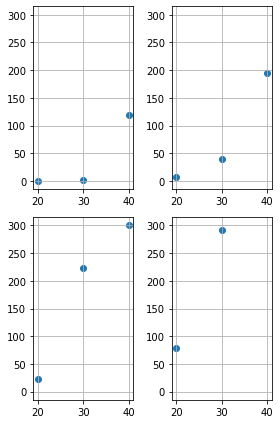

In [5]:
# df1 = df.loc[(df['ex']==1)].copy(deep=True)
# df2 = df.loc[(df['ex']==2)]
# df3 = df.loc[(df['ex']==3)]

# df1['time'] = df['time'].fillna(5*60)


# plot mean times for each density/size combination
points = np.linspace(0, len(mean), len(mean))
points = [20,30,40]
  


fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2, sharey=ax1, sharex=ax1)
ax3 = fig.add_subplot(2, 2, 3, sharey=ax1, sharex=ax1)
ax4 = fig.add_subplot(2, 2, 4, sharey=ax1, sharex=ax1)

ax1.scatter(points, mean[:3])
ax2.scatter(points, mean[3:6])
ax3.scatter(points, mean[6:9])
ax4.scatter(points[:-1], mean[9:])

fig.set_size_inches(4, 6, forward=True)
fig.tight_layout()


ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

plt.show()

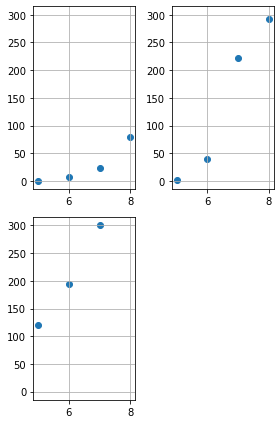

In [6]:
points = [5,6,7,8]
  


fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2, sharey=ax1, sharex=ax1)
ax3 = fig.add_subplot(2, 2, 3, sharey=ax1, sharex=ax1)

ax1.scatter(points, mean[::3])
ax2.scatter(points, mean[1::3])
ax3.scatter(points[:3], mean[2::3])

fig.set_size_inches(4, 6, forward=True)
fig.tight_layout()


ax1.grid()
ax2.grid()
ax3.grid()

plt.show()

[0.36792573606556594, 2.5683630408680376, 119.50608018493318, 8.118940189333323, 40.09910480566808, 194.69680946353475, 23.631675379934798, 222.68144714853358, 300, 78.93638717273134, 291.5617531544665]


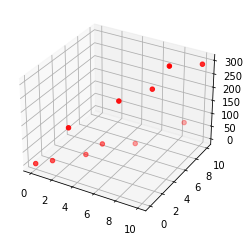

In [7]:
#[mean[:3],mean[3:6],mean[6:9],mean[9:].append(300)],[5,6,7,8]; [mean[::3],mean[1::3],mean[2::3].append(300)]

# importing mplot3d toolkits
from mpl_toolkits import mplot3d

fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')
# defining axes
z = mean
x = range(11)
y = x
print(z)


ax.scatter(x, y, z, color="red")

plt.show()

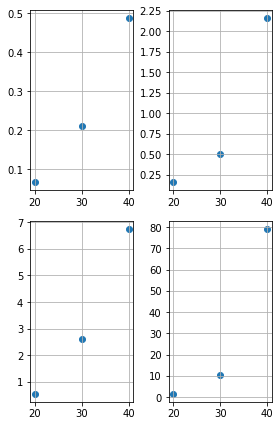

In [8]:
points = np.linspace(0, len(mean), len(mean))
points = [20,30,40]
  


fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.scatter(points, greedyMean[:3])
ax2.scatter(points, greedyMean[3:6])
ax3.scatter(points, greedyMean[6:9])
ax4.scatter(points, greedyMean[9:])

fig.set_size_inches(4, 6, forward=True)
fig.tight_layout()


ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

plt.show()

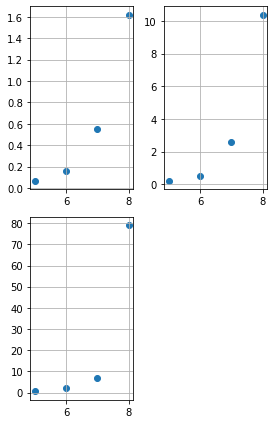

In [9]:
points = [5,6,7,8]
  


fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.scatter(points, greedyMean[::3])
ax2.scatter(points, greedyMean[1::3])
ax3.scatter(points, greedyMean[2::3])

fig.set_size_inches(4, 6, forward=True)
fig.tight_layout()


ax1.grid()
ax2.grid()
ax3.grid()

plt.show()

file      ./benchmark_examples/size5x5/density20/ex1.lp
#moves                                               19
Name: 0, dtype: object
[19.0, 32.0, 20.0, 22.0, 15.0, 23.0, 18.0, 19.0, 20.0, 22.0, 11.0, 16.0, 22.0, 14.0, 12.0]


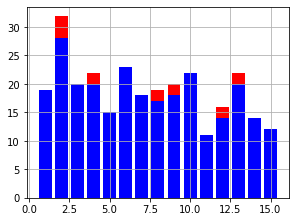

file      ./benchmark_examples/size5x5/density30/ex1.lp
#moves                                               29
Name: 15, dtype: object
[33.0, 16.0, 32.0, 22.0, 19.0, 29.0, 24.0, 37.0, 29.0, 29.0, 26.0, 24.0, 20.0, 23.0, 33.0]


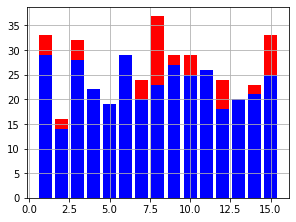

file      ./benchmark_examples/size5x5/density40/ex1.lp
#moves                                               32
Name: 30, dtype: object
[36.0, 53.0, 40.0, 53.0, 42.0, 33.0, 44.0, 37.0, 48.0, 36.0, 29.0, 39.0, 43.0, 43.0, 38.0]


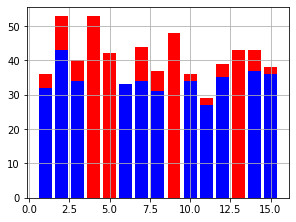

file      ./benchmark_examples/size6x6/density20/ex1.lp
#moves                                               18
Name: 45, dtype: object
[18.0, 27.0, 34.0, 31.0, 27.0, 33.0, 36.0, 39.0, 28.0, 36.0, 31.0, 35.0, 29.0, 31.0, 25.0]


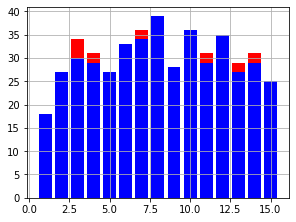

file      ./benchmark_examples/size6x6/density30/ex1.lp
#moves                                               34
Name: 60, dtype: object
[38.0, 49.0, 33.0, 35.0, 50.0, 33.0, 58.0, 53.0, 43.0, 45.0, 54.0, 49.0, 53.0, 42.0, 57.0]


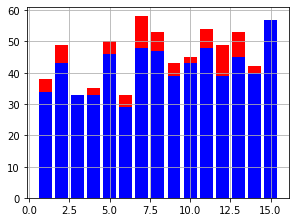

file      ./benchmark_examples/size6x6/density40/ex1.lp
#moves                                               61
Name: 75, dtype: object
[63.0, 67.0, 54.0, 64.0, 96.0, 67.0, 76.0, 78.0, 61.0, 79.0, 61.0, 72.0, 66.0, 73.0, 90.0]


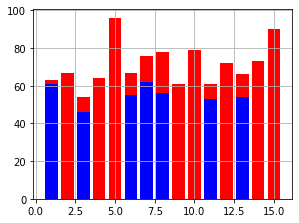

file      ./benchmark_examples/size7x7/density20/ex1.lp
#moves                                               51
Name: 90, dtype: object
[53.0, 50.0, 53.0, 57.0, 39.0, 49.0, 35.0, 54.0, 53.0, 24.0, 58.0, 30.0, 47.0, 44.0, 36.0]


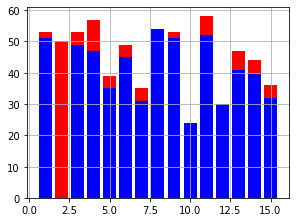

file      ./benchmark_examples/size7x7/density30/ex1.lp
#moves                                              NaN
Name: 105, dtype: object
[66.0, 85.0, 54.0, 69.0, 68.0, 73.0, 87.0, 54.0, 70.0, 66.0, 83.0, 81.0, 80.0, 89.0, 79.0]


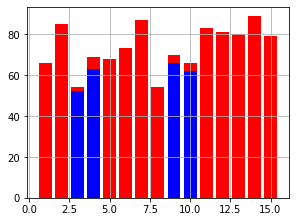

file      ./benchmark_examples/size7x7/density40/ex1.lp
#moves                                              NaN
Name: 120, dtype: object
[95.0, 119.0, 136.0, 115.0, 127.0, 106.0, 96.0, 93.0, 108.0, 111.0, 107.0, 99.0, 92.0, 146.0, 114.0]


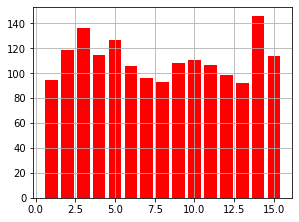

file      ./benchmark_examples/size8x8/density20/ex1.lp
#moves                                               56
Name: 135, dtype: object
[56.0, 76.0, 51.0, 89.0, 72.0, 72.0, 58.0, 61.0, 61.0, 80.0, 62.0, 70.0, 69.0, 68.0, 53.0]


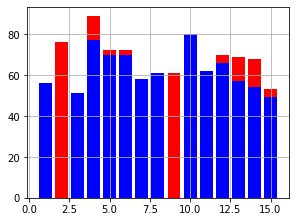

file      ./benchmark_examples/size8x8/density30/ex1.lp
#moves                                              NaN
Name: 150, dtype: object
[106.0, 131.0, 141.0, 140.0, 124.0, 117.0, 116.0, 133.0, 112.0, 107.0, 113.0, 111.0, 136.0, 117.0, 97.0]


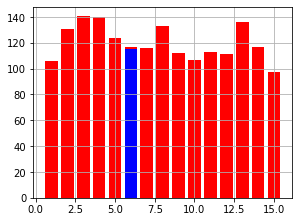

In [10]:
points = [*range(1,16)]

for i in range(len(catList)):
    
    fig = plt.figure()
    
    ax = fig.add_subplot(2, 2, 1)
    
    print(catList[i][['file','#moves']].iloc[0])
    
    print(list(greedyCatList[i]['#moves']))
    
    ax.bar(points, list(greedyCatList[i]['#moves']), color="red")
    ax.bar(points, list(catList[i]['#moves']), color="blue")
    
    #ax.scatter(points, points, c="green")
    
    fig.set_size_inches(8, 6, forward=True)
    fig.tight_layout()  
    
    ax.grid()

    plt.show()

file       ./benchmark_examples/size5x5/density20/ex1.lp
horizon                                                5
Name: 0, dtype: object


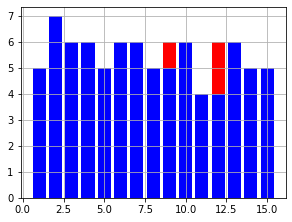

file       ./benchmark_examples/size5x5/density30/ex1.lp
horizon                                                7
Name: 15, dtype: object


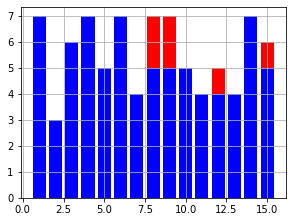

file       ./benchmark_examples/size5x5/density40/ex1.lp
horizon                                                5
Name: 30, dtype: object


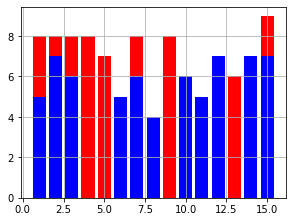

file       ./benchmark_examples/size6x6/density20/ex1.lp
horizon                                                4
Name: 45, dtype: object


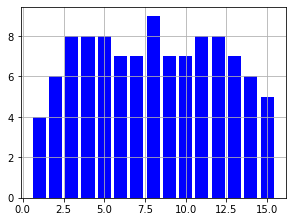

file       ./benchmark_examples/size6x6/density30/ex1.lp
horizon                                                8
Name: 60, dtype: object


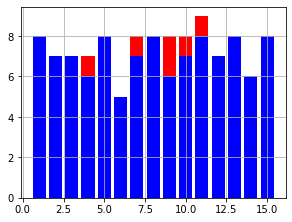

file       ./benchmark_examples/size6x6/density40/ex1.lp
horizon                                                7
Name: 75, dtype: object


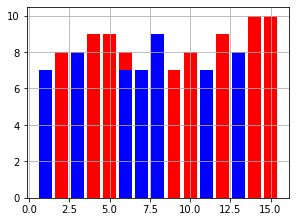

file       ./benchmark_examples/size7x7/density20/ex1.lp
horizon                                                9
Name: 90, dtype: object


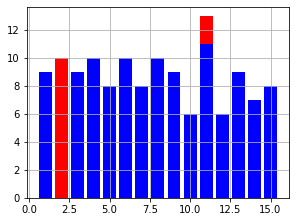

file       ./benchmark_examples/size7x7/density30/ex1.lp
horizon                                              NaN
Name: 105, dtype: object


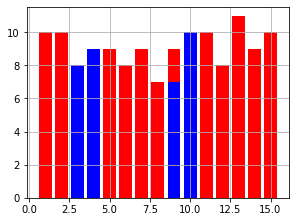

file       ./benchmark_examples/size7x7/density40/ex1.lp
horizon                                              NaN
Name: 120, dtype: object


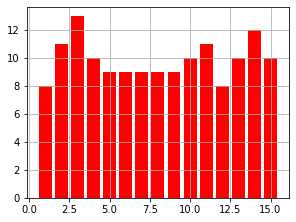

file       ./benchmark_examples/size8x8/density20/ex1.lp
horizon                                                8
Name: 135, dtype: object


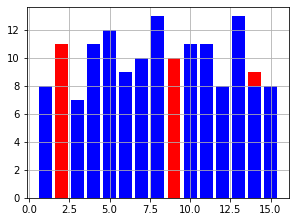

file       ./benchmark_examples/size8x8/density30/ex1.lp
horizon                                              NaN
Name: 150, dtype: object


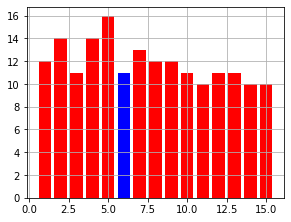

In [11]:
points = [*range(1,16)]

for i in range(len(catList)):
    
    fig = plt.figure()
    
    ax = fig.add_subplot(2, 2, 1)
    
    print(catList[i][['file','horizon']].iloc[0])

    ax.bar(points, list(greedyCatList[i]['horizon']), color = "red")
    ax.bar(points, list(catList[i]['horizon']), color = "blue")
    
    fig.set_size_inches(8, 6, forward=True)
    fig.tight_layout()  
    
    ax.grid()

    plt.show()

In [12]:
print(catList[4]['time'].std())
print(catList[4]['time'].min())
print(catList[4]['time'].max())

44.50882081136548
0.2985205199947813
123.73345802399855


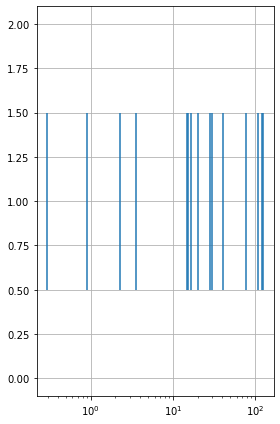

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

plt.xscale('log')

ax1.eventplot(list(catList[4]['time']))

fig.set_size_inches(4, 6, forward=True)
fig.tight_layout()


ax1.grid()

plt.show()

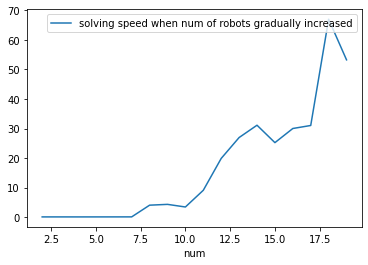

In [14]:
# plotting the data from incrementally increasing num of robots

dfng.plot(x="num", y="time", label="solving speed when num of robots gradually increased")
plt.show()

In [15]:
ideas:
    dreidimensionale Grafik (size - density - time) 
    Durchschnitt aus allen drei ex ziehen (exclude NaN?)   x
    neu messen mit kleineren Abständen bei Dichte
    Optimalität bei greedy vs normal vergleichen
    erstelle mehr num_robots_benchmark Verzeichnisse 
        und bilde Mittel über versch. Messwerte
    erstelle mehr nicht-greedy inc-Läufe
    die Varianz bei Laufzeiten auf einem Beispiel in
        verschiedenen Durchgängen untersuchen
    vielleicht anfängliche Konflikt-Anzahl mitausgeben
    
Was für Aufgaben müssen noch erfüllt werden?
    Arbeit schreiben
    Kommentare in Code schreiben
    Github Erklärungen/Aufbau verbessern

SyntaxError: invalid syntax (<ipython-input-15-12eda355a14c>, line 1)